In [46]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/07112023_Challenge/CryptoClustering/Starter_Code 5/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)


In [7]:
# Create a DataFrame with the scaled data

df_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)


In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xlabel="Number of Clusters (k)", ylabel="Inertia")

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, n_init=10)

In [13]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, n_init=10)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
df_clustered = df_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered["clusters"] = clusters

# Display sample data
print(df_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_clustered.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="clusters", hover_cols=["coin_id"])

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components = 3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca_model.fit_transform(df_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)

# View the first five rows of the DataFrame. 
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print("Explained Variance Ratios:")
print(explained_variance)

Explained Variance Ratios:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.89503166

In [21]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)

# Copy the crypto names from the original data
df_pca_data["coin_id"] = df_scaled.index #"coin_id" is already set as index


# Display sample data
df_pca_data.head()

,PC1,PC2,PC3,coin_id
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [35]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [36]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_model.fit(df_pca_data.iloc[:, :-1]) # Exclude index column "coin_id"
    inertia_values_pca.append(kmeans_model.inertia_)

In [37]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [38]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve for PCA Data", xlabel="Number of Clusters (k)", ylabel="Inertia")

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [39]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_model_pca = KMeans(n_clusters=best_k, n_init=10)

In [40]:
# Create a DataFrame with only the numeric columns from df_pca_data
df_numeric_pca_data = df_pca_data.drop("coin_id", axis=1)

In [41]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_numeric_pca_data)

KMeans(n_clusters=4, n_init=10)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_model_pca.predict(df_numeric_pca_data)
# Print the resulting array of cluster values.
print(predicted_clusters_pca)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [43]:
# Create a copy of the DataFrame with the PCA data
df_clusters = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clusters["cluster"] = predicted_clusters_pca

# Display sample data
df_clusters.head()

,PC1,PC2,PC3,coin_id,cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,3
ripple,-0.471835,-0.222660,-0.479053,ripple,3
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0


In [44]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clusters.hvplot.scatter(
    x = "PC1",
    y = "PC2",
    c = "cluster",
    colormap = "viridis",
    hover_cols=["coin_id"]
)

scatter_plot

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

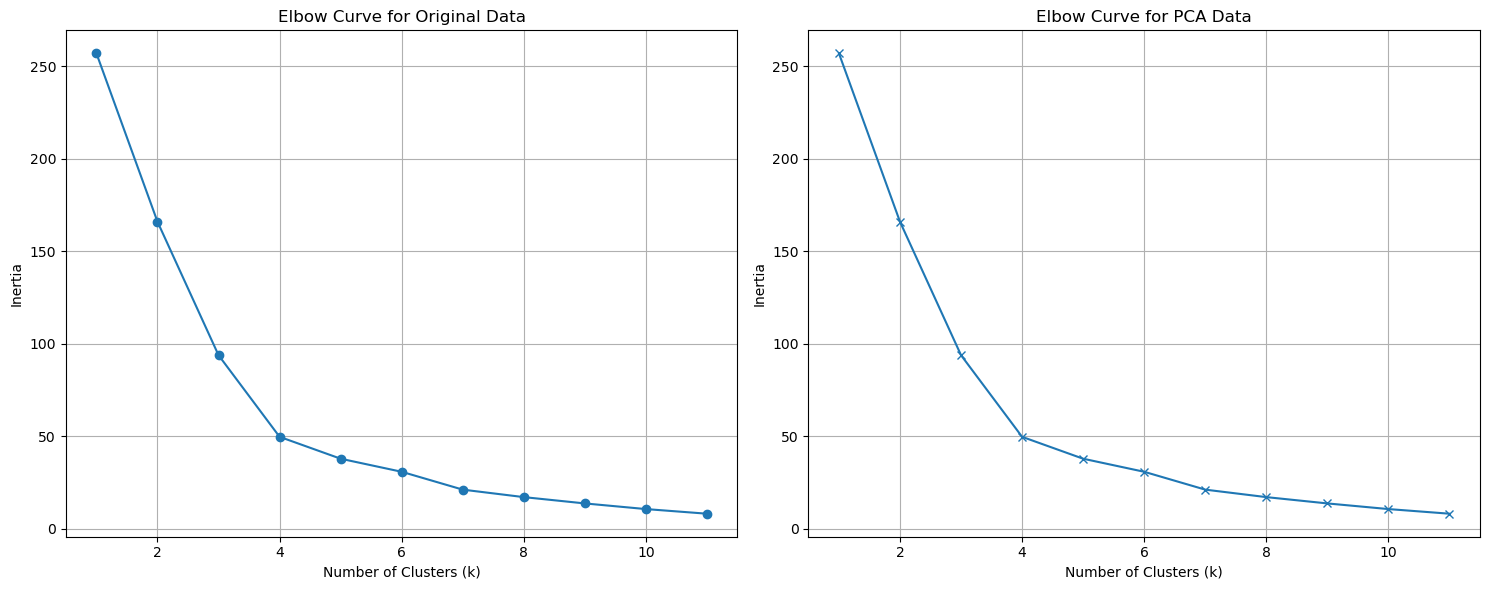

In [47]:
# Composite plot to contrast the Elbow curves
# Original Elbow
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Original Data')
plt.grid()

# PCA Elbow
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_pca, marker='x')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for PCA Data')
plt.grid()

plt.tight_layout()
plt.show()

In [48]:
# Composite plot to contrast the clusters
# Scatter plot for the original data
scatter_plot_original = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters",
    colormap="viridis",
    hover_cols=["coin_id"]
)

# Scatter plot for PCA data
scatter_plot_pca = df_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="cluster",
    colormap="viridis",
    hover_cols=["coin_id"]
)

# Combine plots
composite_plot = (scatter_plot_original + scatter_plot_pca).cols(2)

# Show composite
composite_plot

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The clusters are much tighter. Some data that might have been either relevent or irrelevant could have been removed or combined into other features.